In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_excel("../../dataset/First Experiment/Aegean/Aegean(SKG_BRU).xlsx")
df = pd.DataFrame(data)

In [4]:
df.head()

,departure_time,arrival_time,days_before,day_of_week,num_of_luggage,num_of_stops,overnight_flight,Class,price
0,08:30:00,11:00:00,0,2,0,1,1,220,255.28
1,10:15:00,11:00:00,0,2,0,1,1,220,255.28
2,11:30:00,11:00:00,0,2,0,1,1,220,255.28
3,15:00:00,11:00:00,0,2,0,1,1,220,255.28
4,17:00:00,11:00:00,0,2,0,1,1,220,255.28


In [5]:
for i in df.columns:
  print(i,"\t\t-\t", df[i].isna().mean()*100)

departure_time 		-	 0.0
arrival_time 		-	 0.0
days_before 		-	 0.0
day_of_week 		-	 0.0
num_of_luggage 		-	 0.0
num_of_stops 		-	 0.0
overnight_flight 		-	 0.0
Class 		-	 0.0
price 		-	 0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15426 entries, 0 to 15425
Data columns (total 9 columns):
departure_time      15426 non-null object
arrival_time        15426 non-null object
days_before         15426 non-null int64
day_of_week         15426 non-null int64
num_of_luggage      15426 non-null int64
num_of_stops        15426 non-null int64
overnight_flight    15426 non-null int64
Class               15426 non-null int64
price               15426 non-null float64
dtypes: float64(1), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
df.shape

(15426, 9)

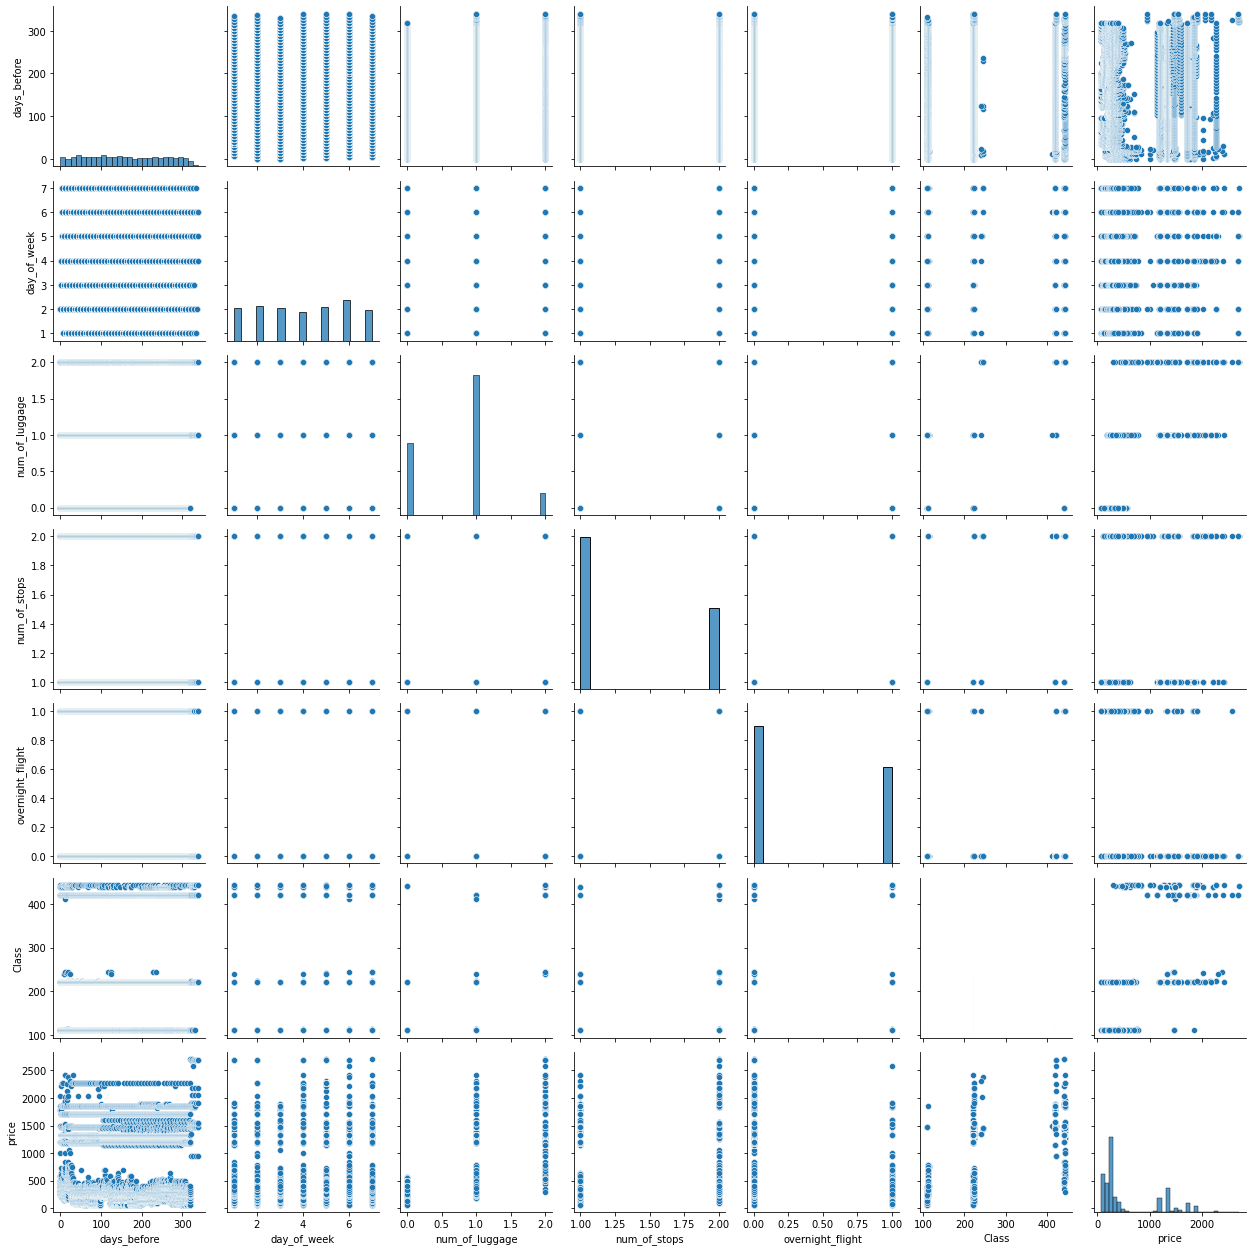

In [8]:
sns.pairplot(df)
plt.tight_layout()

In [9]:
df['departure_time'] = pd.to_datetime(df['departure_time'], format='%H:%M:%S')

In [10]:
df['arrival_time'] = pd.to_datetime(df['arrival_time'], format='%H:%M:%S')

In [11]:
df.head()

,departure_time,arrival_time,days_before,day_of_week,num_of_luggage,num_of_stops,overnight_flight,Class,price
0,1900-01-01 08:30:00,1900-01-01 11:00:00,0,2,0,1,1,220,255.28
1,1900-01-01 10:15:00,1900-01-01 11:00:00,0,2,0,1,1,220,255.28
2,1900-01-01 11:30:00,1900-01-01 11:00:00,0,2,0,1,1,220,255.28
3,1900-01-01 15:00:00,1900-01-01 11:00:00,0,2,0,1,1,220,255.28
4,1900-01-01 17:00:00,1900-01-01 11:00:00,0,2,0,1,1,220,255.28


In [12]:
df['departuretime'] = pd.to_datetime(df['departure_time']).astype(np.int64)

In [13]:
df['arrivaltime'] = pd.to_datetime(df['arrival_time']).astype(np.int64)

In [14]:
df.head()

,departure_time,arrival_time,days_before,day_of_week,num_of_luggage,num_of_stops,overnight_flight,Class,price,departuretime,arrivaltime
0,1900-01-01 08:30:00,1900-01-01 11:00:00,0,2,0,1,1,220,255.28,-2208958200000000000,-2208949200000000000
1,1900-01-01 10:15:00,1900-01-01 11:00:00,0,2,0,1,1,220,255.28,-2208951900000000000,-2208949200000000000
2,1900-01-01 11:30:00,1900-01-01 11:00:00,0,2,0,1,1,220,255.28,-2208947400000000000,-2208949200000000000
3,1900-01-01 15:00:00,1900-01-01 11:00:00,0,2,0,1,1,220,255.28,-2208934800000000000,-2208949200000000000
4,1900-01-01 17:00:00,1900-01-01 11:00:00,0,2,0,1,1,220,255.28,-2208927600000000000,-2208949200000000000


In [15]:
df.columns

Index(['departure_time', 'arrival_time', 'days_before', 'day_of_week',
       'num_of_luggage', 'num_of_stops', 'overnight_flight', 'Class', 'price',
       'departuretime', 'arrivaltime'],
      dtype='object')

In [16]:
df = df[['departuretime','arrivaltime','day_of_week', 'days_before','num_of_luggage', 'num_of_stops', 'overnight_flight','Class','price']]

In [17]:
del df['departuretime']

In [18]:
del df['arrivaltime']

In [19]:
#df = df.apply(np.int64)

In [20]:
df.head()

,day_of_week,days_before,num_of_luggage,num_of_stops,overnight_flight,Class,price
0,2,0,0,1,1,220,255.28
1,2,0,0,1,1,220,255.28
2,2,0,0,1,1,220,255.28
3,2,0,0,1,1,220,255.28
4,2,0,0,1,1,220,255.28


In [21]:
df.to_csv('skg_bru_proc.csv')

In [22]:
X = df.drop(['price'], axis=1)
y = df['price']

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

In [1]:
ML_Model = []
accuracy = []

#function to call for storing the results
def storeResults(model, a):
    ML_Model.append(model)
    accuracy.append(round(a, 3))

# AdaBoost

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [25]:
crossvalidation=KFold(n_splits=10,shuffle=True,random_state=1)

In [26]:
from sklearn.ensemble import AdaBoostRegressor
search_grid={'n_estimators':[5000,10000,20000],'learning_rate':[.001,0.01,.1],'random_state':[1]}
adr = AdaBoostRegressor()
search=GridSearchCV(estimator=adr,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1,cv=crossvalidation)
search.fit(X_train,y_train)


GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=AdaBoostRegressor(), n_jobs=1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'n_estimators': [5000, 10000, 20000],
                         'random_state': [1]},
             scoring='neg_mean_squared_error')

In [27]:
y_pred = search.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.6446110694689764


In [2]:
ab_sc = r2_score(y_test, y_pred)
storeResults('AdaBoost',ab_sc)

# Bagging Regressor

In [28]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

clf = BaggingRegressor(DecisionTreeRegressor(),n_estimators=10000, random_state=0)

clf.fit(X_train,y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=10000,
                 random_state=0)

In [29]:
y_pred = clf.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.768651206670817


In [3]:
bag_sc = r2_score(y_test, y_pred)
storeResults('Bagging',bag_sc)

# Gradient Boosting

In [30]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=10000, random_state=0)

gbr.fit(X_train,y_train)

y_pred = gbr.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.7572704451324936


In [4]:
gb_sc = r2_score(y_test, y_pred)
storeResults('Gradient Boosting',gb_sc)

# Decision Tree

In [31]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=0)

dtr.fit(X_train,y_train)

y_pred = dtr.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.7697613401354871


In [5]:
dt_sc = r2_score(y_test, y_pred)
storeResults('Decision Tree',dt_sc)

# RAndom Forest

In [32]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

rfr = RandomForestRegressor(max_depth=2, random_state=0)

grid_forest = GridSearchCV(rfr,param_grid=param_grid)

grid_forest.fit(X_train,y_train)

y_pred = grid_forest.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.6962306503486952


In [6]:
rf_sc = r2_score(y_test, y_pred)
storeResults('Random Forest',rf_sc)

# Extra Tree

In [33]:
from sklearn.ensemble import ExtraTreesRegressor

etr = ExtraTreesRegressor(n_estimators=10000, random_state=0)

etr.fit(X_train,y_train)

y_pred = etr.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.7697613221247264


In [7]:
et_sc = r2_score(y_test, y_pred)
storeResults('Extra Tree',et_sc)

# SVR

In [34]:
from sklearn.svm import SVR

sr = SVR(C=1.0, epsilon=0.2)

sr.fit(X_train,y_train)

y_pred = sr.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.2246764567180708


In [8]:
svr_sc = r2_score(y_test, y_pred)
storeResults('SVR',svr_sc)

# MLP

In [35]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(random_state=1, max_iter=500)
mlp.fit(X_train,y_train)

y_pred = mlp.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.6596112772813865


In [9]:
mlp_sc = r2_score(y_test, y_pred)
storeResults('MLP',mlp_sc)

# DL

In [36]:
X_train = np.array(X).reshape(X.shape[0], X.shape[1], 1)
X_test = np.array(X).reshape(X.shape[0], X.shape[1], 1)

In [37]:
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Create 2 virtual GPUs with 1GB memory each
  try:
    tf.config.set_logical_device_configuration(
        gpus[0],
        [tf.config.LogicalDeviceConfiguration(memory_limit=1024),
         tf.config.LogicalDeviceConfiguration(memory_limit=1024)])
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPU,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

1 Physical GPU, 2 Logical GPUs


In [38]:
from tensorflow.keras import Sequential,utils
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout

# VGG11

In [39]:
def vgg11():
    
    model = Sequential()
    
    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(64, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(128, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [40]:
model = vgg11()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 6, 32)             128       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 6, 64)             6208      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 6, 128)            41088     
_________________________________________________________________
flatten (Flatten)            (None, 768)               0         
_________________________________________________________________
dense (Dense)                (None, 50)                38450     
_________________________________________________________________
dense_1 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2

In [41]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

Epoch 1/200
386/386 [==============================] - 5s 4ms/step - loss: 223525.5156 - val_loss: 233116.2656
Epoch 2/200
386/386 [==============================] - 1s 4ms/step - loss: 143468.3438 - val_loss: 229725.0625
Epoch 3/200
386/386 [==============================] - 1s 4ms/step - loss: 112877.9531 - val_loss: 129703.3594
Epoch 4/200
386/386 [==============================] - 1s 4ms/step - loss: 108225.3984 - val_loss: 132689.2188
Epoch 5/200
386/386 [==============================] - 2s 4ms/step - loss: 104329.2500 - val_loss: 167423.1875
Epoch 6/200
386/386 [==============================] - 2s 4ms/step - loss: 102398.5078 - val_loss: 136227.0625
Epoch 7/200
386/386 [==============================] - 2s 4ms/step - loss: 99998.9609 - val_loss: 126591.6562
Epoch 8/200
386/386 [==============================] - 2s 4ms/step - loss: 100658.3984 - val_loss: 122892.8984
Epoch 9/200
386/386 [==============================] - 1s 4ms/step - loss: 99832.7188 - val_loss: 125751.9922
Epo

386/386 [==============================] - 1s 4ms/step - loss: 83947.5078 - val_loss: 127032.0547
Epoch 148/200
386/386 [==============================] - 2s 4ms/step - loss: 83841.3906 - val_loss: 125220.5859
Epoch 149/200
386/386 [==============================] - 1s 4ms/step - loss: 84050.4375 - val_loss: 131009.2656
Epoch 150/200
386/386 [==============================] - 2s 4ms/step - loss: 84102.4844 - val_loss: 121806.3828
Epoch 151/200
386/386 [==============================] - 2s 4ms/step - loss: 83945.2344 - val_loss: 124290.1016
Epoch 152/200
386/386 [==============================] - 2s 4ms/step - loss: 84140.9219 - val_loss: 161629.0938
Epoch 153/200
386/386 [==============================] - 1s 4ms/step - loss: 83969.8984 - val_loss: 125934.4844
Epoch 154/200
386/386 [==============================] - 2s 4ms/step - loss: 84091.6250 - val_loss: 125058.7812
Epoch 155/200
386/386 [==============================] - 2s 4ms/step - loss: 84081.2891 - val_loss: 130871.8906
Epoch 

In [42]:
y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Accuracy score of the predictions: 0.7159869718179872


In [10]:
vgg_sc = r2_score(y, y_pred)
storeResults('VGG11',vgg_sc)

# VGG13

In [43]:
def vgg13():
    
    model = Sequential()
    
    model.add(Conv1D(16, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(64, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [44]:
model = vgg13()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 6, 16)             64        
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 6, 32)             1568      
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 6, 64)             10304     
_________________________________________________________________
flatten_1 (Flatten)          (None, 384)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                19250     
_________________________________________________________________
dense_4 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [45]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

Epoch 1/200
386/386 [==============================] - 2s 4ms/step - loss: 237544.7188 - val_loss: 239271.6250
Epoch 2/200
386/386 [==============================] - 1s 4ms/step - loss: 194457.0781 - val_loss: 197364.3906
Epoch 3/200
386/386 [==============================] - 1s 4ms/step - loss: 130919.1250 - val_loss: 184095.6719
Epoch 4/200
386/386 [==============================] - 1s 4ms/step - loss: 116230.8672 - val_loss: 154692.6094
Epoch 5/200
386/386 [==============================] - 1s 4ms/step - loss: 110975.8516 - val_loss: 182703.0312
Epoch 6/200
386/386 [==============================] - 1s 4ms/step - loss: 107387.6875 - val_loss: 131392.5938
Epoch 7/200
386/386 [==============================] - 1s 4ms/step - loss: 103728.2891 - val_loss: 144825.8906
Epoch 8/200
386/386 [==============================] - 1s 4ms/step - loss: 102446.9297 - val_loss: 125746.8594
Epoch 9/200
386/386 [==============================] - 1s 4ms/step - loss: 99546.2109 - val_loss: 138435.5156
Ep

386/386 [==============================] - 1s 4ms/step - loss: 85740.2109 - val_loss: 128423.1250
Epoch 148/200
386/386 [==============================] - 1s 4ms/step - loss: 85279.8438 - val_loss: 128121.4766
Epoch 149/200
386/386 [==============================] - 1s 4ms/step - loss: 84963.7422 - val_loss: 132823.7812
Epoch 150/200
386/386 [==============================] - 1s 4ms/step - loss: 85383.0859 - val_loss: 123892.7578
Epoch 151/200
386/386 [==============================] - 1s 4ms/step - loss: 84636.3203 - val_loss: 130636.7578
Epoch 152/200
386/386 [==============================] - 1s 4ms/step - loss: 84977.2266 - val_loss: 124484.6562
Epoch 153/200
386/386 [==============================] - 1s 4ms/step - loss: 85182.2656 - val_loss: 136249.8438
Epoch 154/200
386/386 [==============================] - 1s 4ms/step - loss: 85447.6719 - val_loss: 127968.2891
Epoch 155/200
386/386 [==============================] - 1s 4ms/step - loss: 84927.5156 - val_loss: 125695.5547
Epoch 

In [46]:
y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Accuracy score of the predictions: 0.712288549477982


In [11]:
vgg1_sc = r2_score(y, y_pred)
storeResults('VGG13',vgg1_sc)

# ResNet18

In [47]:
def resnet18():
    
    model = Sequential()
    
    model.add(Conv1D(16, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(64, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = resnet18()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 6, 16)             64        
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 6, 32)             1568      
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 6, 64)             10304     
_________________________________________________________________
flatten_2 (Flatten)          (None, 384)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 50)                19250     
_________________________________________________________________
dense_7 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

In [48]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Epoch 1/200
386/386 [==============================] - 2s 4ms/step - loss: 227433.5938 - val_loss: 248224.5000
Epoch 2/200
386/386 [==============================] - 1s 4ms/step - loss: 196857.3750 - val_loss: 180493.3750
Epoch 3/200
386/386 [==============================] - 1s 4ms/step - loss: 126628.1875 - val_loss: 143986.8125
Epoch 4/200
386/386 [==============================] - 1s 4ms/step - loss: 111205.8984 - val_loss: 159974.4375
Epoch 5/200
386/386 [==============================] - 1s 4ms/step - loss: 107654.9844 - val_loss: 139746.6719
Epoch 6/200
386/386 [==============================] - 1s 4ms/step - loss: 104402.0938 - val_loss: 170441.6562
Epoch 7/200
386/386 [==============================] - 1s 4ms/step - loss: 102633.9688 - val_loss: 137964.6094
Epoch 8/200
386/386 [==============================] - 1s 4ms/step - loss: 103972.5000 - val_loss: 132448.0469
Epoch 9/200
386/386 [==============================] - 1s 4ms/step - loss: 100611.8984 - val_loss: 145396.5156
E

Epoch 75/200
386/386 [==============================] - 1s 4ms/step - loss: 88601.2031 - val_loss: 120734.7344
Epoch 76/200
386/386 [==============================] - 1s 3ms/step - loss: 87161.2578 - val_loss: 126904.1172
Epoch 77/200
386/386 [==============================] - 1s 3ms/step - loss: 87158.0703 - val_loss: 123218.2500
Epoch 78/200
386/386 [==============================] - 1s 4ms/step - loss: 88113.4922 - val_loss: 130291.3594
Epoch 79/200
386/386 [==============================] - 1s 4ms/step - loss: 87311.0547 - val_loss: 130663.9453
Epoch 80/200
386/386 [==============================] - 1s 4ms/step - loss: 87276.8906 - val_loss: 153512.5938
Epoch 81/200
386/386 [==============================] - 1s 4ms/step - loss: 86788.3281 - val_loss: 141182.5312
Epoch 82/200
386/386 [==============================] - 1s 4ms/step - loss: 87968.8516 - val_loss: 124773.1953
Epoch 83/200
386/386 [==============================] - 1s 4ms/step - loss: 86822.3750 - val_loss: 120342.0625
E

386/386 [==============================] - 1s 4ms/step - loss: 84542.8047 - val_loss: 127855.8438
Epoch 149/200
386/386 [==============================] - 1s 4ms/step - loss: 84350.3125 - val_loss: 128908.7891
Epoch 150/200
386/386 [==============================] - 1s 4ms/step - loss: 84105.7422 - val_loss: 127334.1562
Epoch 151/200
386/386 [==============================] - ETA: 0s - loss: 83528.539 - 1s 4ms/step - loss: 83819.3594 - val_loss: 135395.6094
Epoch 152/200
386/386 [==============================] - 1s 4ms/step - loss: 84162.5859 - val_loss: 142574.1562
Epoch 153/200
386/386 [==============================] - 1s 4ms/step - loss: 83647.9453 - val_loss: 131516.7812
Epoch 154/200
386/386 [==============================] - 1s 4ms/step - loss: 84241.3516 - val_loss: 126319.8828
Epoch 155/200
386/386 [==============================] - 1s 4ms/step - loss: 84149.7969 - val_loss: 129551.5469
Epoch 156/200
386/386 [==============================] - 1s 4ms/step - loss: 84559.4922 - 

In [12]:
res18_sc = r2_score(y, y_pred)
storeResults('ResNet18',res18_sc)

# ResNet34

In [49]:
def resnet34():
    
    model = Sequential()
    
    model.add(Conv1D(64, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(128, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(516, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = resnet34()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 6, 64)             256       
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 6, 128)            24704     
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 6, 516)            330756    
_________________________________________________________________
flatten_3 (Flatten)          (None, 3096)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 50)                154850    
_________________________________________________________________
dense_10 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

In [50]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Epoch 1/200
386/386 [==============================] - 2s 5ms/step - loss: 216101.7500 - val_loss: 182839.4219
Epoch 2/200
386/386 [==============================] - 1s 4ms/step - loss: 122941.9453 - val_loss: 132368.1094
Epoch 3/200
386/386 [==============================] - 1s 4ms/step - loss: 112217.8203 - val_loss: 130391.4141
Epoch 4/200
386/386 [==============================] - 2s 4ms/step - loss: 106808.5938 - val_loss: 135455.7969
Epoch 5/200
386/386 [==============================] - 2s 4ms/step - loss: 102348.6719 - val_loss: 164881.5000
Epoch 6/200
386/386 [==============================] - 2s 4ms/step - loss: 101849.2266 - val_loss: 125557.6719
Epoch 7/200
386/386 [==============================] - 2s 4ms/step - loss: 100345.2578 - val_loss: 129208.8438
Epoch 8/200
386/386 [==============================] - 2s 4ms/step - loss: 101032.5781 - val_loss: 135675.8906
Epoch 9/200
386/386 [==============================] - 2s 4ms/step - loss: 100735.2109 - val_loss: 126866.2422
E

Epoch 75/200
386/386 [==============================] - 2s 4ms/step - loss: 88504.6797 - val_loss: 123254.7188
Epoch 76/200
386/386 [==============================] - 2s 4ms/step - loss: 87878.6562 - val_loss: 124227.2969
Epoch 77/200
386/386 [==============================] - 2s 4ms/step - loss: 87913.7500 - val_loss: 121942.0156
Epoch 78/200
386/386 [==============================] - 2s 4ms/step - loss: 87863.2031 - val_loss: 120682.4453
Epoch 79/200
386/386 [==============================] - 2s 4ms/step - loss: 87437.5859 - val_loss: 120327.2031
Epoch 80/200
386/386 [==============================] - 2s 4ms/step - loss: 87789.4141 - val_loss: 122180.0234
Epoch 81/200
386/386 [==============================] - 2s 4ms/step - loss: 87750.4297 - val_loss: 131586.3281
Epoch 82/200
386/386 [==============================] - 2s 4ms/step - loss: 87626.4375 - val_loss: 118516.0781
Epoch 83/200
386/386 [==============================] - 2s 4ms/step - loss: 87926.7812 - val_loss: 129566.6172
E

In [13]:
res34_sc = r2_score(y, y_pred)
storeResults('ResNet34',res34_sc)

# MobileNetv1

In [51]:
def mobilenetv1():
    
    model = Sequential()
    
    model.add(Conv1D(8, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(16, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(32, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = mobilenetv1()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           (None, 6, 8)              32        
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 6, 16)             400       
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 6, 32)             2592      
_________________________________________________________________
flatten_4 (Flatten)          (None, 192)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 50)                9650      
_________________________________________________________________
dense_13 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                

In [52]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Epoch 1/200
386/386 [==============================] - 2s 4ms/step - loss: 246490.7188 - val_loss: 234590.5000
Epoch 2/200
386/386 [==============================] - 1s 4ms/step - loss: 214931.2031 - val_loss: 236257.3438
Epoch 3/200
386/386 [==============================] - 1s 4ms/step - loss: 201063.6250 - val_loss: 195763.5000
Epoch 4/200
386/386 [==============================] - 1s 4ms/step - loss: 151288.6719 - val_loss: 158296.7500
Epoch 5/200
386/386 [==============================] - 1s 4ms/step - loss: 125521.9375 - val_loss: 134847.7188
Epoch 6/200
386/386 [==============================] - 1s 4ms/step - loss: 116437.6719 - val_loss: 130022.8203
Epoch 7/200
386/386 [==============================] - 1s 4ms/step - loss: 109314.8125 - val_loss: 135274.7344
Epoch 8/200
386/386 [==============================] - 1s 4ms/step - loss: 107105.9062 - val_loss: 143323.7812
Epoch 9/200
386/386 [==============================] - 1s 4ms/step - loss: 104629.9141 - val_loss: 135270.5781
E

Epoch 147/200
386/386 [==============================] - 1s 4ms/step - loss: 85880.8672 - val_loss: 129930.1797
Epoch 148/200
386/386 [==============================] - 1s 4ms/step - loss: 86161.9844 - val_loss: 122596.9219
Epoch 149/200
386/386 [==============================] - 1s 4ms/step - loss: 86337.7656 - val_loss: 123942.6875
Epoch 150/200
386/386 [==============================] - 1s 4ms/step - loss: 85642.6250 - val_loss: 126371.4453
Epoch 151/200
386/386 [==============================] - 1s 4ms/step - loss: 86536.9688 - val_loss: 124616.4688
Epoch 152/200
386/386 [==============================] - 1s 4ms/step - loss: 85621.5781 - val_loss: 124330.1406
Epoch 153/200
386/386 [==============================] - 1s 4ms/step - loss: 85834.9609 - val_loss: 132274.5781
Epoch 154/200
386/386 [==============================] - 1s 4ms/step - loss: 86742.1953 - val_loss: 128908.0469
Epoch 155/200
386/386 [==============================] - 1s 4ms/step - loss: 85720.6797 - val_loss: 1271

In [14]:
mob1_sc = r2_score(y, y_pred)
storeResults('MobileNetV1',mob1_sc)

# MobileNetV2

In [53]:
def mobilenetv2():
    
    model = Sequential()
    
    model.add(Conv1D(128, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(516, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(1024, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = mobilenetv2()
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_15 (Conv1D)           (None, 6, 128)            512       
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 6, 516)            198660    
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 6, 1024)           2642944   
_________________________________________________________________
flatten_5 (Flatten)          (None, 6144)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 50)                307250    
_________________________________________________________________
dense_16 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                

In [54]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Epoch 1/200
386/386 [==============================] - 2s 5ms/step - loss: 220810.9062 - val_loss: 180190.0469
Epoch 2/200
386/386 [==============================] - 2s 4ms/step - loss: 126541.5156 - val_loss: 147280.3594
Epoch 3/200
386/386 [==============================] - 2s 4ms/step - loss: 109066.8281 - val_loss: 132285.0000
Epoch 4/200
386/386 [==============================] - 2s 5ms/step - loss: 105723.5469 - val_loss: 146965.6250
Epoch 5/200
386/386 [==============================] - 2s 5ms/step - loss: 101559.0156 - val_loss: 136368.1406
Epoch 6/200
386/386 [==============================] - 2s 5ms/step - loss: 101766.6094 - val_loss: 145901.2344
Epoch 7/200
386/386 [==============================] - 2s 5ms/step - loss: 100012.5078 - val_loss: 156419.6719
Epoch 8/200
386/386 [==============================] - 2s 5ms/step - loss: 98523.7500 - val_loss: 167728.8438
Epoch 9/200
386/386 [==============================] - 2s 5ms/step - loss: 99228.3047 - val_loss: 144107.5781
Epo

386/386 [==============================] - 2s 5ms/step - loss: 85503.9062 - val_loss: 124711.7344A: 0s - loss
Epoch 147/200
386/386 [==============================] - 2s 5ms/step - loss: 85289.3984 - val_loss: 136271.6719
Epoch 148/200
386/386 [==============================] - 2s 5ms/step - loss: 85679.2188 - val_loss: 121607.5469
Epoch 149/200
386/386 [==============================] - 2s 5ms/step - loss: 85665.1328 - val_loss: 124845.3047
Epoch 150/200
386/386 [==============================] - 2s 5ms/step - loss: 85255.1641 - val_loss: 127161.1016
Epoch 151/200
386/386 [==============================] - 2s 5ms/step - loss: 85725.4219 - val_loss: 152528.2031
Epoch 152/200
386/386 [==============================] - 2s 5ms/step - loss: 85104.3047 - val_loss: 120193.6484
Epoch 153/200
386/386 [==============================] - 2s 5ms/step - loss: 85119.3750 - val_loss: 126632.0781
Epoch 154/200
386/386 [==============================] - 2s 5ms/step - loss: 84375.1797 - val_loss: 155430

In [15]:
mob2_sc = r2_score(y, y_pred)
storeResults('MobileNetV2',mob2_sc)

# Comparison

In [16]:
#creating dataframe
import pandas as pd
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'R2-Score' : accuracy,
                      })

In [17]:
result

,ML Model,R2-Score
0,AdaBoost,0.645
1,Bagging,0.769
2,Gradient Boosting,0.757
3,Decision Tree,0.770
4,Random Forest,0.696
5,Extra Tree,0.770
6,SVR,0.225
7,MLP,0.660
8,VGG11,0.716
9,VGG13,0.712


# Graph

In [18]:
import numpy as np
classifier = ML_Model
y_pos = np.arange(len(classifier))

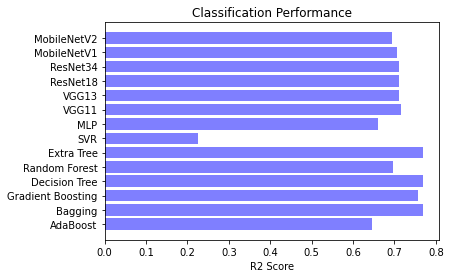

In [20]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('R2 Score')
plt2.title('Classification Performance')
plt2.show()